# 1. Introduction

Once we have retrieved the video game data from the [RWAG database API](https://api.rawg.io/docs/) and cleaned the data, we can now process to perform some data visualisation.

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from PIL import Image

## 1.1 Quick Checks on Dataframe

In [2]:
df = pd.read_csv('../Data/data5.csv')

In [3]:
df.drop(['rating_top', 'reviews_text_count', 'playtime', 'parent_platforms'], axis = 1, inplace = True)
df.head()

,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
0,1,25097,The Legend of Zelda: Ocarina of Time,1998-11-21,4.39,486,872,99.0,350,490,"GameCube, Wii, Nintendo_64, Wii_U","(1, 31), (3, 32), (4, 110), (5, 317)","Action, Adventure, RPG",Singleplayer,1998
1,2,54751,Soulcalibur,1998-07-30,4.38,47,167,98.0,578,47,"iOS, Android, Xbox_360, Dreamcast, Xbox_One","(3, 5), (4, 19), (5, 23)","Action, Fighting",2 players,1998
2,3,3498,Grand Theft Auto V,2013-09-17,4.48,3796,12383,97.0,422,3832,"PlayStation_5, PC, PlayStation_4, PlayStation_...","(1, 64), (3, 226), (4, 1273), (5, 2269)","Action, Adventure",Full controller support Steam Achievements Atm...,2013
3,4,22511,The Legend of Zelda: Breath of the Wild,2017-03-02,4.56,1711,3284,97.0,344,1743,"Nintendo_Switch, Wii_U","(1, 81), (3, 91), (4, 268), (5, 1303)","Action, Adventure, RPG",Action-Adventure Open World RPG Sandbox exclusive,2017
4,5,27036,Super Mario Galaxy 2,2010-05-23,4.37,222,420,97.0,326,226,"Wii, Wii_U","(1, 15), (3, 14), (4, 54), (5, 143)",Platformer,Solo princess Gravity mario collect baby castl...,2010


In [4]:
# Look for missing data and check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10744 entries, 0 to 10743
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               10744 non-null  int64  
 1   id                 10744 non-null  int64  
 2   name               10744 non-null  object 
 3   released           10744 non-null  object 
 4   rating             10744 non-null  float64
 5   ratings_count      10744 non-null  int64  
 6   added              10744 non-null  int64  
 7   metacritic         3299 non-null   float64
 8   suggestions_count  10744 non-null  int64  
 9   reviews_count      10744 non-null  int64  
 10  platforms          10740 non-null  object 
 11  ratings            10744 non-null  object 
 12  genres             10215 non-null  object 
 13  tags               9958 non-null   object 
 14  Year               10744 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

rank                    0
id                      0
name                    0
released                0
rating                  0
ratings_count           0
added                   0
metacritic           7445
suggestions_count       0
reviews_count           0
platforms               4
ratings                 0
genres                529
tags                  786
Year                    0
dtype: int64

In [6]:
df.isnull().sum()

rank                    0
id                      0
name                    0
released                0
rating                  0
ratings_count           0
added                   0
metacritic           7445
suggestions_count       0
reviews_count           0
platforms               4
ratings                 0
genres                529
tags                  786
Year                    0
dtype: int64

# 2. Exploratory Data Analysis

## 2.1 Number of Games Released by the Year

In [7]:
year = df.groupby("Year")

### 2.1.1 By Most Games Released

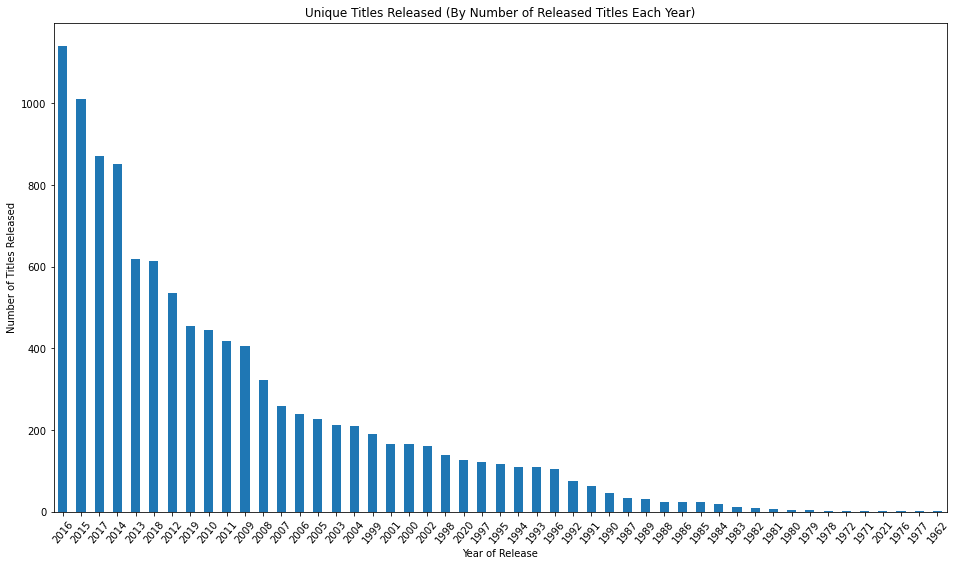

In [8]:
plt.figure(figsize=(16,9))
year.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year of Release")
plt.ylabel("Number of Titles Released")
plt.title("Unique Titles Released (By Number of Released Titles Each Year)")
plt.show()

### 2.1.2 By Year

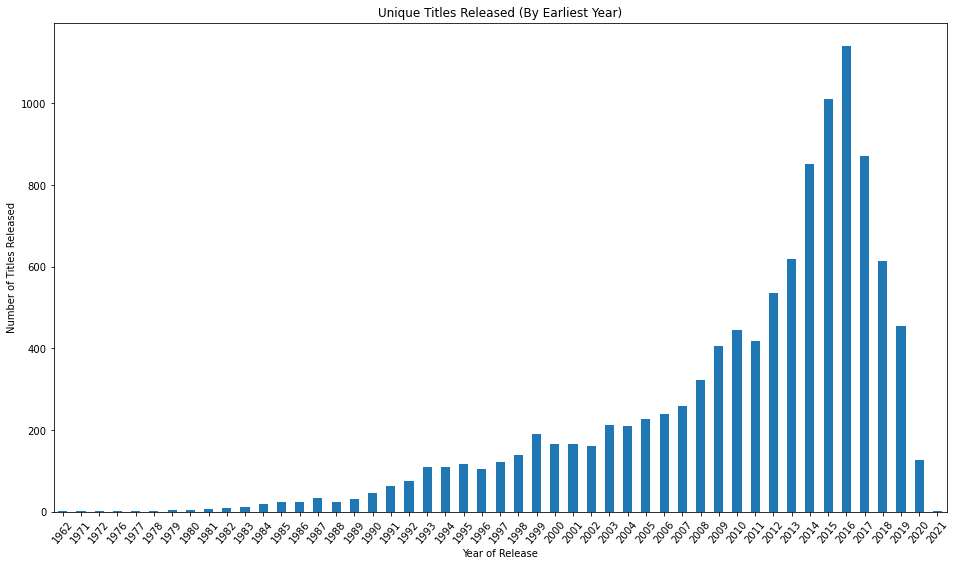

In [9]:
plt.figure(figsize = (16,9))
year.size().plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year of Release")
plt.ylabel("Number of Titles Released")
plt.title("Unique Titles Released (By Earliest Year)")
plt.show()

It seems that the number of games developed increases exponetially over the years, hitting the peak at 2016. This could be due to the fact that mobile gaming is gaining popularity. In fact, several AAA game studios are tapping into this market such as Activision's **Call of Duty: Mobile** and Square Enix's **Final Fantasy Brave Exvius**. The freemium business model has proven to be quite lurative, with **Call of Duty: Mobile** making an estimated \\$480 million in total revenue in its first year and EA's \\$692 million in Fiscal Year 2020. <br>

Not counting mobile games, games in general are becoming increasingly more complex and larger, thereby costing more development time and effort to make them. This could explain the fall in titles developed after 2016. <br>

Let's see the platform breakdown of these games.

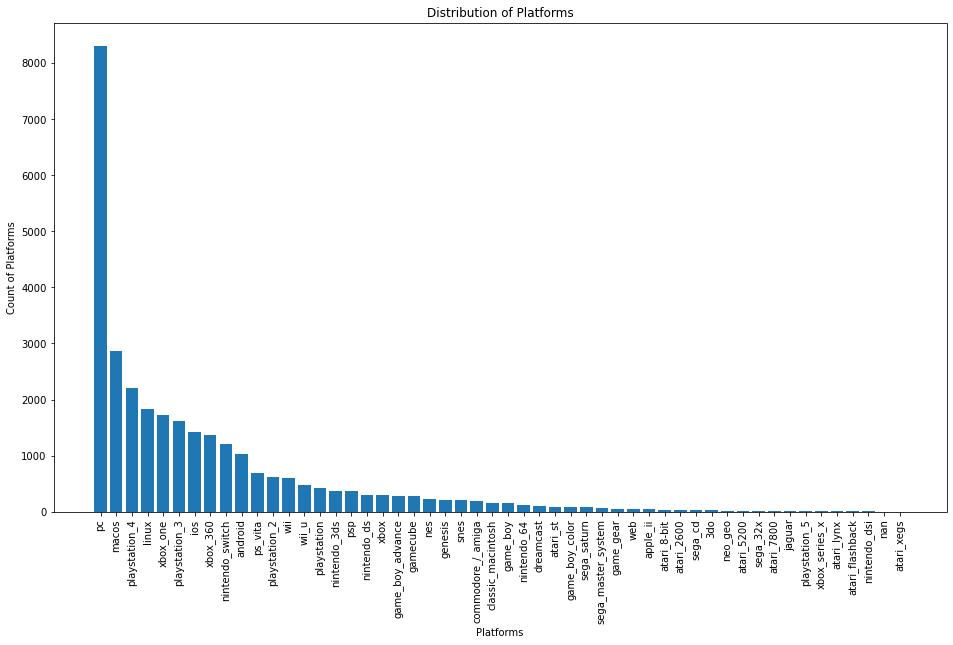

In [10]:
df['platforms'] = df['platforms'].astype(str)

df['platforms'] = df['platforms'].str.replace(',', '')

from collections import Counter
results = Counter()
df['platforms'].str.lower().str.split().apply(results.update)

import collections
from collections import OrderedDict

# to sort the dictionary
results = OrderedDict(sorted(results.items(), key=lambda t: t[1], reverse=True))

w = collections.Counter(results)

# plot settings
plt.figure(figsize=(16,9))
plt.bar(w.keys(), w.values())
plt.xticks(rotation=90)
plt.xlabel("Platforms")
plt.ylabel("Count of Platforms")
plt.title("Distribution of Platforms")
plt.show()

PC make up by far the largest proportion, followed by the Mac OS, PlayStation 4, Linux and Xbox One. PC games have been around for the longest time, thus it is not surprising to see its titles accumulate into a significant figure. Not only does the PC features AAA games, it also offers PC ports of both console and mobile games. <br>

After the PC are the consoles, PlayStation 4 and Xbox One. These platforms generally feature AAA games - big-budget games that require huge development teams months (or even years) to develop. <br>

The iOS and Android are catching up with the consoles as more people are picking up mobile gaming. <br>

These observations seem to support the idea presented earlier.

# 2.2 Average Metacritic Score by the Year

In [11]:
# get the mean of each year
temp = year.mean().sort_values(by="metacritic",ascending=False)
temp.drop(['rank' ,'id', 'rating', 'ratings_count', 'added', 'suggestions_count', 'reviews_count'], axis = 1).head(10)

,metacritic
Year,
1992,90.000000
1998,89.666667
1994,84.000000
1997,83.800000
1999,82.450000
2000,82.323529
1991,81.000000
2001,80.888889
1996,80.333333


On average, 1992 has the highest overall Metacritic score of 90, with 1998 nearly having the exact average score.

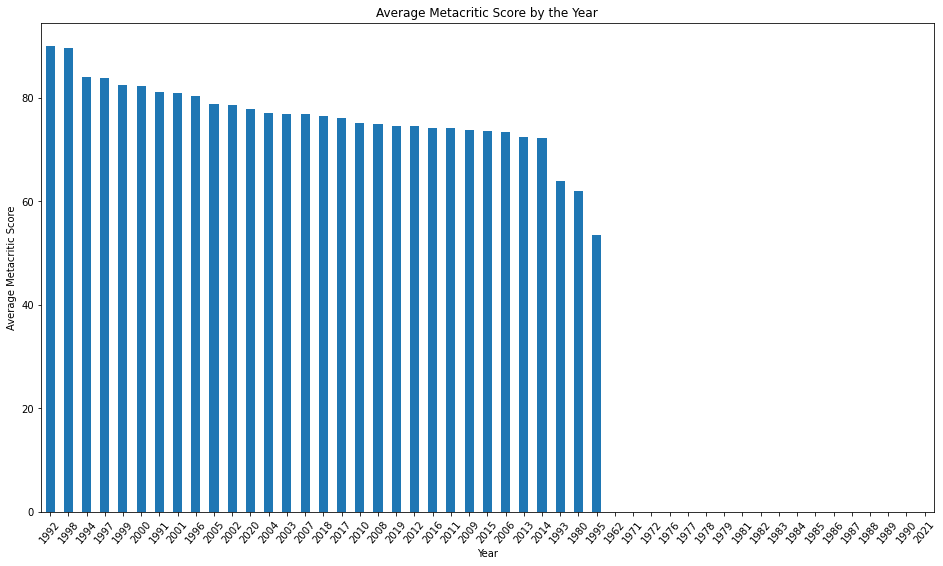

In [12]:
plt.figure(figsize = (16,9))
temp['metacritic'].plot.bar()

# plot settings
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Average Metacritic Score")
plt.title("Average Metacritic Score by the Year")
plt.show()

The plot suggests that the "best" year of gaming seem to be in 1992 and 1998. Let's have a closer look into the titles released in 1992.

In [13]:
df_1992 = df[df['Year'] == 1992]
df_1992.sort_values(by = "metacritic", ascending = False, inplace = True)
df_1992.head(10)

<ipython-input-13-e064b5b01b8a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
168,169,2528,DRAGON QUEST V,1992-09-27,4.00,7,21,90.0,443,8,iOS Nintendo_DS SNES Android PlayStation_2,"(1, 1), (4, 4), (5, 3)",RPG,RPG Story Monsters party japan battle ball are...,1992
3445,3446,54285,Mortal Kombat,1992-10-08,3.93,311,1421,NaN,292,312,PC Commodore_/_Amiga SEGA_CD SEGA_Master_Syste...,"(1, 16), (3, 47), (4, 177), (5, 72)",Fighting,2 players,1992
3609,3610,4005,Wolfenstein 3D,1992-05-05,4.18,194,999,NaN,355,196,PC SNES Classic_Macintosh Game_Boy_Advance mac...,"(1, 3), (3, 23), (4, 103), (5, 67)","Action, Shooter",1990's Steam Cloud Classic First-Person FPS Mo...,1992
3717,3718,2552,Sonic the Hedgehog 2,1992-11-21,4.25,244,851,NaN,578,247,GameCube PC iOS Android Game_Gear PlayStation_...,"(1, 7), (3, 14), (4, 130), (5, 96)","Action, Arcade, Platformer",1990's 2D Partial Controller Support Classic C...,1992
3728,3729,22733,Lure of the Temptress,1992-04-11,2.23,63,842,NaN,557,64,PC macOS Linux Commodore_/_Amiga Atari_ST Clas...,"(1, 33), (3, 19), (4, 7), (5, 5)",Adventure,Singleplayer,1992
3965,3966,4678,Streets of Rage 2,1992-12-20,4.06,159,646,NaN,454,160,iOS Genesis Classic_Macintosh Android Linux PC...,"(1, 9), (3, 12), (4, 90), (5, 49)","Action, Arcade, Casual",2D Partial Controller Support Beat 'em up Clas...,1992
4240,4241,16115,Indiana Jones and the Fate of Atlantis,1992-05-31,4.18,75,522,NaN,486,77,macOS PC Linux,"(1, 6), (3, 8), (4, 23), (5, 40)",Adventure,1990's Steam Cloud Classic Local Co-Op Pixel G...,1992
4493,4494,15235,Wizardry 7: Crusaders of the Dark Savant,1992-10-15,2.73,11,441,NaN,252,11,PC Linux macOS,"(1, 4), (3, 2), (4, 5)","Adventure, RPG",Classic CRPG Dungeon Crawler Fantasy First-Per...,1992
4853,4854,1922,FINAL FANTASY V,1992-12-06,4.16,90,360,NaN,357,90,iOS PC Android SNES PS_Vita Game_Boy_Advance P...,"(1, 4), (3, 5), (4, 50), (5, 31)",RPG,1990's 2D Partial Controller Support Anime Ste...,1992
5659,5660,17786,Cosmo's Cosmic Adventure,1992-02-29,2.43,7,243,NaN,365,7,PC Linux macOS,"(1, 2), (3, 5)","Action, Adventure, Arcade, Platformer",1990's 2D Partial Controller Support Classic R...,1992


In [14]:
a = df_1992[df_1992['metacritic'].isnull()==False]
a

,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
168,169,2528,DRAGON QUEST V,1992-09-27,4.0,7,21,90.0,443,8,iOS Nintendo_DS SNES Android PlayStation_2,"(1, 1), (4, 4), (5, 3)",RPG,RPG Story Monsters party japan battle ball are...,1992


It appears that only **Dragon Quest V** has a `metacritic` score assigned to it, with all other titles released on 1992 lacking one. Thus 1992 may not be the "best" year of gaming.

## 2.3 Highest Metacritic Scores by the Year

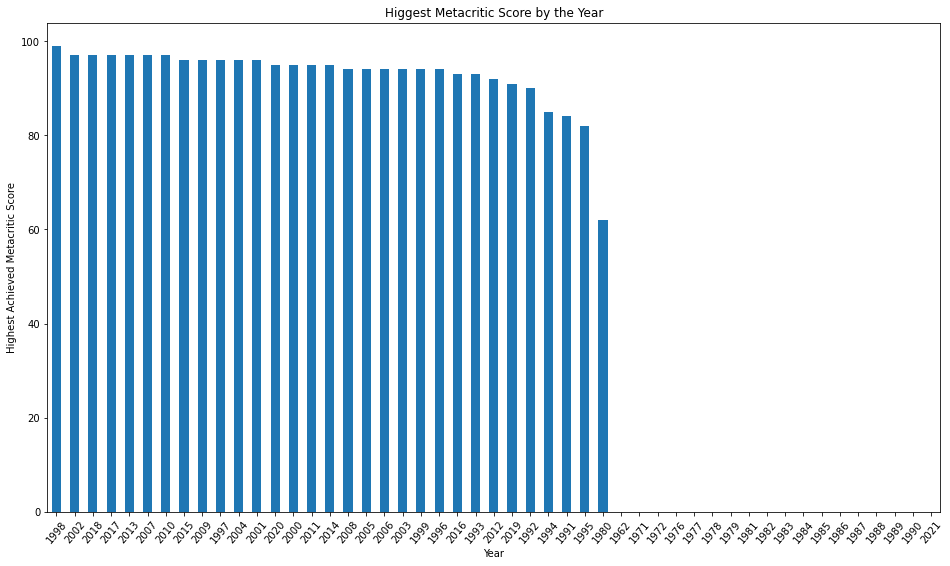

In [15]:
year = df.groupby("Year")
plt.figure(figsize = (16,9))

# Style selector
# sns.barplot(year.agg({'metacritic': 'max'}).index, year.agg({'metacritic': 'max'})['metacritic'])
# year.agg({'metacritic': 'max'})["metacritic"].plot.bar() # unsorted

# sns.barplot(x=year.agg({'metacritic': 'max'}).index, y=year.agg({'metacritic': 'max'})['metacritic'], data=df, order=df.sort_values(year.agg({'metacritic': 'max'})['metacritic'], ascending=False))
year.agg({'metacritic': 'max'}).sort_values(by="metacritic",ascending=False)["metacritic"].plot.bar() # sorted descending

# Settings of plot labels
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Highest Achieved Metacritic Score")
plt.title("Higgest Metacritic Score by the Year")
plt.show()

The game with the highest Metacritic score ever recorded in the database is in 1998.

In [16]:
df_1998 = df[df['Year'] == 1998]
df_1998.sort_values(by = "metacritic", ascending = False, inplace = True)
df_1998.head(10)

<ipython-input-16-158e4f4d32c0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
0,1,25097,The Legend of Zelda: Ocarina of Time,1998-11-21,4.39,486,872,99.0,350,490,GameCube Wii Nintendo_64 Wii_U,"(1, 31), (3, 32), (4, 110), (5, 317)","Action, Adventure, RPG",Singleplayer,1998
1,2,54751,Soulcalibur,1998-07-30,4.38,47,167,98.0,578,47,iOS Android Xbox_360 Dreamcast Xbox_One,"(3, 5), (4, 19), (5, 23)","Action, Fighting",2 players,1998
15,16,18080,Half-Life,1998-11-19,4.37,1246,5683,96.0,518,1253,PC Linux macOS PlayStation_2,"(1, 43), (3, 94), (4, 425), (5, 691)","Action, Shooter",1990's Aliens Atmospheric Valve Anti-Cheat ena...,1998
73,74,10050,Thief Gold,1998-11-29,4.12,149,2119,92.0,490,149,PC,"(1, 14), (3, 11), (4, 53), (5, 71)","Action, Simulation",1990's Atmospheric Classic Cult Classic Dark D...,1998
80,81,28532,Banjo-Kazooie,1998-06-29,4.24,168,778,92.0,450,168,Nintendo_64 Xbox_360,"(1, 3), (3, 19), (4, 78), (5, 68)","Action, Adventure, Platformer",bird fun,1998
140,141,5426,Crash Bandicoot 3: Warped,1998-10-31,4.30,461,1662,91.0,412,461,PSP PlayStation_3 PlayStation PS_Vita,"(1, 16), (3, 29), (4, 203), (5, 213)","Action, Adventure",Singleplayer exclusive,1998
141,142,31495,Baldur's Gate,1998-12-21,4.38,93,196,91.0,514,94,PC iOS macOS,"(1, 4), (3, 4), (4, 34), (5, 52)","RPG, Strategy",Dragons Multiplayer War party character sword ...,1998
281,282,22289,Shogo: Mobile Armor Division,1998-09-30,3.97,29,112,88.0,490,29,PC Classic_Macintosh Linux Commodore_/_Amiga,"(1, 2), (3, 7), (4, 8), (5, 12)","Action, Shooter, Adventure, Strategy",Anime First-Person FPS Local Multiplayer Mechs...,1998
303,304,57607,Metal Gear Solid,1998-09-03,4.41,641,1053,88.0,457,645,PlayStation PS_Vita PC PSP PlayStation_3,"(1, 38), (3, 37), (4, 157), (5, 413)","Action, Shooter, Adventure",Singleplayer exclusive,1998
430,431,19299,Fallout 2: A Post Nuclear Role Playing Game,1998-09-30,4.36,680,2931,86.0,493,683,PC macOS,"(1, 52), (3, 47), (4, 138), (5, 446)",RPG,2D Steam Cloud Atmospheric Classic CRPG Dark H...,1998


Before using `inplace=True`, there were rows with missing `metacritic` values on this top 10 list. 
Would the results be different in we rank by the API's internal `ratings` instead?

## 2.4 Highest Internal Rating by Year

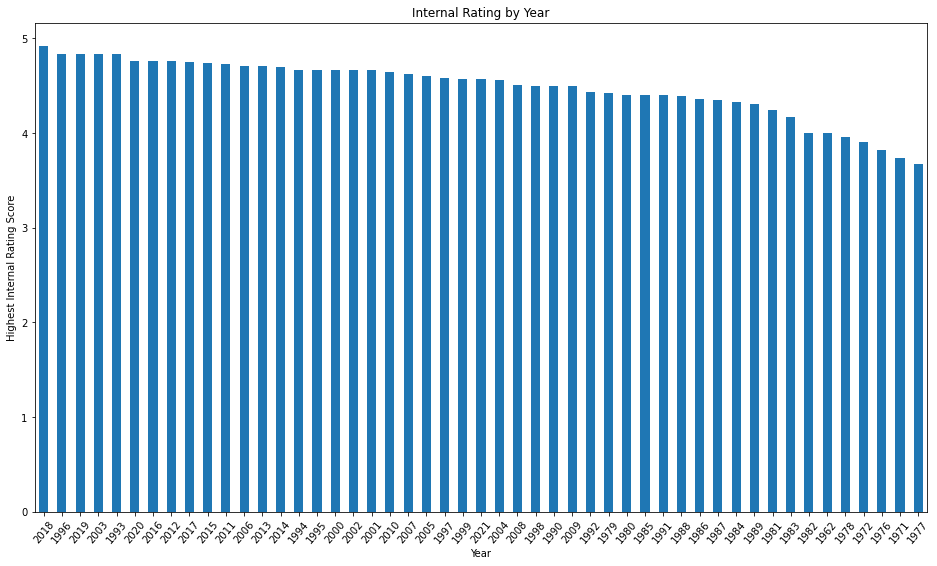

In [17]:
year = df.groupby("Year")
plt.figure(figsize=(16,9))

# year.agg({'rating': 'max'})['rating'].plot.bar() # unsorted
year.agg({'rating': 'max'}).sort_values(by="rating",ascending=False)['rating'].plot.bar() # sorted descending

# Settings of plot labels
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Highest Internal Rating Score")
plt.title("Internal Rating by Year")
plt.show()

2018's highest `rating` is higher than 1998's. There appears to be more data when using the API's `ratings` instead of `metacritic`. This is possibly due to the fact that professional game reviewers are more likely to cover the more popular games. Thus they may miss out on hidden gems such as those within the `indie` genre. Let's look at the titles from 2018 with the highest ratings:

In [18]:
#df_2018 = df[(df['Year'] == 2018) & (df['metacritic'].isnull())]
df_2018 = df[(df['Year'] == 2018)]
df_2018.sort_values(by="rating",ascending=False, inplace=True)
df_2018.head(10)

<ipython-input-18-dde01264ab9b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
8889,8890,46156,Shovel Knight: King of Cards,2018-03-31,4.92,13,41,NaN,739,13,macOS PC Linux Wii_U Nintendo_3DS Nintendo_Switch,"(4, 1), (5, 12)","Action, Adventure, Indie, Platformer",Full controller support Steam Achievements Ste...,2018
8590,8591,61409,Heaven Will Be Mine,2018-07-25,4.83,6,50,NaN,141,6,PC iOS Linux macOS,"(4, 1), (5, 5)","Adventure, RPG, Indie",Captions available Anime Steam Achievements Fe...,2018
9253,9254,28159,HUNTDOWN,2018-12-31,4.75,6,33,NaN,284,8,PlayStation_4 Xbox_One Linux PC Nintendo_Switc...,"(3, 1), (5, 7)","Action, Indie",2D Full controller support Steam Achievements ...,2018
10156,10157,51921,Cytus II,2018-01-17,4.75,8,17,NaN,249,8,iOS Android,"(4, 2), (5, 6)","Arcade, Casual",Music Rhythm Space Story japan city explore ro...,2018
799,800,58823,Splatoon 2: Octo Expansion,2018-06-12,4.65,43,101,82.0,253,43,Nintendo_Switch,"(1, 1), (3, 1), (4, 9), (5, 32)","Action, Shooter",Multiplayer character escape battle girl,2018
45,46,58175,God of War,2018-04-20,4.61,2587,7177,94.0,642,2633,PlayStation_4,"(1, 88), (3, 98), (4, 489), (5, 1958)","Action, Adventure",Action-Adventure Atmospheric Blood RPG Singlep...,2018
7,8,28,Red Dead Redemption 2,2018-10-26,4.56,2556,7855,97.0,645,2601,PC Xbox_One PlayStation_4,"(1, 80), (3, 157), (4, 504), (5, 1860)","Action, Adventure",In-App Purchases America Partial Controller Su...,2018
9361,9362,61493,Out of the Park Baseball 19,2018-03-22,4.50,10,30,NaN,272,10,Linux macOS PC,"(3, 1), (4, 3), (5, 6)","Strategy, Simulation, Sports, Indie",Steam Achievements Steam Workshop Management S...,2018
9960,9961,59167,PICROSS S2,2018-08-02,4.50,8,19,NaN,91,8,Nintendo_Switch,"(4, 4), (5, 4)",NaN,Story,2018
9427,9428,50591,Hello Charlotte: Childhood's End,2018-01-05,4.50,8,29,NaN,135,8,PC,"(4, 4), (5, 4)","RPG, Indie",Steam Achievements Gore Horror RPG Singleplaye...,2018


**Shovel Knight: King of Cards** actually has a `metacritic` score of 83. Apprantly it is not reflected in the RWAG database (likewise for **HUNTDOWN**). <br>
Now, comparing the results from pulling 1998 titles using `rating` instead of `metacritic`:

In [19]:
df_1998r = df[df['Year'] == 1998]
df_1998r.sort_values(by = "rating", ascending = False, inplace = True)
df_1998r.head(10)

<ipython-input-19-78e2527ece14>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
8955,8956,22957,SiN Gold,1998-10-30,4.50,6,40,NaN,489,6,macOS PC,"(4, 3), (5, 3)",Shooter,Multiplayer Singleplayer,1998
5864,5865,257189,StarCraft: Brood War,1998-11-30,4.50,140,221,NaN,233,141,PC macOS,"(1, 2), (3, 12), (4, 39), (5, 88)",NaN,NaN,1998
9489,9490,27213,Wario Land 2,1998-03-01,4.45,11,28,NaN,183,11,Nintendo_3DS Game_Boy_Color Game_Boy,"(3, 1), (4, 4), (5, 6)",NaN,Singleplayer,1998
9084,9085,31777,Thief: The Dark Project,1998-12-02,4.44,16,37,NaN,479,16,PC,"(1, 1), (3, 1), (4, 3), (5, 11)",Action,NaN,1998
8412,8413,30746,Might and Magic 6: The Mandate of Heaven,1998-04-30,4.44,24,58,NaN,380,25,PC,"(1, 1), (3, 2), (4, 6), (5, 16)",RPG,NaN,1998
10153,10154,52765,Bushido Blade 2,1998-03-19,4.44,9,17,NaN,312,9,PlayStation PSP PS_Vita PlayStation_3,"(3, 1), (4, 3), (5, 5)",Fighting,Multiplayer Singleplayer,1998
10152,10153,52769,Bust a Groove,1998-01-29,4.44,9,17,NaN,227,9,PlayStation,"(4, 5), (5, 4)",Fighting,Multiplayer Music Rhythm Singleplayer rhythm-b...,1998
10301,10302,53004,Guilty Gear,1998-05-14,4.43,7,15,NaN,445,7,PlayStation PSP PS_Vita PlayStation_3,"(4, 4), (5, 3)",Fighting,Multiplayer Singleplayer,1998
8777,8778,54720,Railroad Tycoon II,1998-10-31,4.42,24,44,NaN,401,24,Dreamcast PlayStation Classic_Macintosh Linux PC,"(3, 2), (4, 10), (5, 12)",NaN,Multiplayer Singleplayer,1998
8433,8434,57846,Tenchu: Stealth Assassins,1998-02-26,4.41,27,57,NaN,381,27,PlayStation,"(3, 1), (4, 14), (5, 12)",NaN,Singleplayer exclusive true exclusive,1998


Most of these titles from 1998 are good classic games. They just aren't as popular as the ones from the `metacritic` list. All of them have at least a sequel. Maybe it's because their brand names aren't as well-known as compared to famous franchise like The **Legend of Zelda, Soul Calibur, Half-Life, Metal Gear Solid** and **Fallout**.

## 2.5 Top 100 Video Games by Metacritic Scores

In [20]:
df.sort_values(by='metacritic', ascending=False, inplace=True)
df.head(100)

,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
0,1,25097,The Legend of Zelda: Ocarina of Time,1998-11-21,4.39,486,872,99.0,350,490,GameCube Wii Nintendo_64 Wii_U,"(1, 31), (3, 32), (4, 110), (5, 317)","Action, Adventure, RPG",Singleplayer,1998
1,2,54751,Soulcalibur,1998-07-30,4.38,47,167,98.0,578,47,iOS Android Xbox_360 Dreamcast Xbox_One,"(3, 5), (4, 19), (5, 23)","Action, Fighting",2 players,1998
2,3,3498,Grand Theft Auto V,2013-09-17,4.48,3796,12383,97.0,422,3832,PlayStation_5 PC PlayStation_4 PlayStation_3 X...,"(1, 64), (3, 226), (4, 1273), (5, 2269)","Action, Adventure",Full controller support Steam Achievements Atm...,2013
3,4,22511,The Legend of Zelda: Breath of the Wild,2017-03-02,4.56,1711,3284,97.0,344,1743,Nintendo_Switch Wii_U,"(1, 81), (3, 91), (4, 268), (5, 1303)","Action, Adventure, RPG",Action-Adventure Open World RPG Sandbox exclusive,2017
4,5,27036,Super Mario Galaxy 2,2010-05-23,4.37,222,420,97.0,326,226,Wii Wii_U,"(1, 15), (3, 14), (4, 54), (5, 143)",Platformer,Solo princess Gravity mario collect baby castl...,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,23760,Bayonetta 2,2014-09-20,4.28,182,490,92.0,592,188,Wii_U Nintendo_Switch,"(1, 13), (3, 17), (4, 49), (5, 109)",Action,Hack and Slash exclusive,2014
130,131,28613,Halo: Reach,2010-09-14,4.29,468,1901,91.0,678,470,Xbox_One PC Xbox_360,"(1, 17), (3, 38), (4, 191), (5, 224)",Shooter,exclusive,2010
129,130,4248,Dishonored,2012-09-25,4.35,1435,5187,91.0,698,1445,PC Xbox_360 Xbox_One PlayStation_3 PlayStation_4,"(1, 33), (3, 123), (4, 562), (5, 727)","Action, Shooter, Adventure, RPG",Full controller support Steam Achievements Ass...,2012
128,129,17576,Batman: Arkham City - Game of the Year Edition,2012-09-07,4.39,895,4797,91.0,641,896,Xbox_360 PC PlayStation_4 Xbox_One macOS,"(1, 20), (3, 50), (4, 365), (5, 461)","Action, Adventure",3D Vision Action-Adventure Partial Controller ...,2012


## 2.6 Top 100 Video Games by Genre
Total genre count:

In [21]:
df['genres'] = df['genres'].astype(str)
df['genres'] = df['genres'].str.replace(',', '')

from collections import Counter
results = Counter()
df['genres'].str.lower().str.split().apply(results.update)
print(results)

Counter({'action': 5103, 'indie': 3507, 'adventure': 3296, 'rpg': 2042, 'strategy': 1827, 'casual': 1479, 'simulation': 1243, 'shooter': 1007, 'arcade': 971, 'puzzle': 684, 'racing': 617, 'sports': 590, 'nan': 529, 'platformer': 491, 'fighting': 352, 'massively': 327, 'multiplayer': 327, 'family': 164, 'board': 82, 'games': 82, 'card': 64, 'educational': 64})


### 2.6.1 Overall Highest Rated Genre Among Top 100

In [23]:
top_100_df = df.sort_values(by='metacritic', ascending=False)[:100]
top_100_df

,rank,id,name,released,rating,ratings_count,added,metacritic,suggestions_count,reviews_count,platforms,ratings,genres,tags,Year
0,1,25097,The Legend of Zelda: Ocarina of Time,1998-11-21,4.39,486,872,99.0,350,490,GameCube Wii Nintendo_64 Wii_U,"(1, 31), (3, 32), (4, 110), (5, 317)",Action Adventure RPG,Singleplayer,1998
1,2,54751,Soulcalibur,1998-07-30,4.38,47,167,98.0,578,47,iOS Android Xbox_360 Dreamcast Xbox_One,"(3, 5), (4, 19), (5, 23)",Action Fighting,2 players,1998
2,3,3498,Grand Theft Auto V,2013-09-17,4.48,3796,12383,97.0,422,3832,PlayStation_5 PC PlayStation_4 PlayStation_3 X...,"(1, 64), (3, 226), (4, 1273), (5, 2269)",Action Adventure,Full controller support Steam Achievements Atm...,2013
3,4,22511,The Legend of Zelda: Breath of the Wild,2017-03-02,4.56,1711,3284,97.0,344,1743,Nintendo_Switch Wii_U,"(1, 81), (3, 91), (4, 268), (5, 1303)",Action Adventure RPG,Action-Adventure Open World RPG Sandbox exclusive,2017
4,5,27036,Super Mario Galaxy 2,2010-05-23,4.37,222,420,97.0,326,226,Wii Wii_U,"(1, 15), (3, 14), (4, 54), (5, 143)",Platformer,Solo princess Gravity mario collect baby castl...,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,30445,Warcraft 3: Reign of Chaos,2002-06-01,4.41,725,1034,92.0,528,727,PC macOS,"(1, 37), (3, 42), (4, 197), (5, 451)",RPG Strategy,exclusive true exclusive,2002
104,105,19369,Call of Duty,2003-10-29,4.16,392,1118,91.0,591,397,PlayStation_3 Xbox_360 PC macOS,"(1, 8), (3, 29), (4, 244), (5, 116)",Action Shooter Simulation,America Atmospheric Classic First-Person FPS H...,2003
103,104,244693,Ninja Gaiden (2004),2004-03-02,4.12,8,21,91.0,659,8,Xbox,"(3, 2), (4, 3), (5, 3)",Action,Ninja sword,2004
101,102,297208,NieR:Automata Game of the YoRHa Edition,2019-02-26,4.14,71,279,91.0,198,71,PlayStation_4 PC,"(1, 7), (3, 9), (4, 15), (5, 40)",Action,War Story battle planet destroy invaders,2019


In [25]:
# For top 100
top_100_df['genres'] = top_100_df['genres'].astype(str)
# remove comma
top_100_df['genres'] = top_100_df['genres'].str.replace(',', '')

from collections import Counter

results = Counter()
top_100_df['genres'].str.lower().str.split().apply(results.update)
print(results)

Counter({'action': 53, 'adventure': 35, 'rpg': 27, 'shooter': 20, 'strategy': 11, 'platformer': 8, 'racing': 6, 'fighting': 5, 'arcade': 5, 'indie': 5, 'puzzle': 4, 'sports': 4, 'casual': 3, 'simulation': 3, 'massively': 2, 'multiplayer': 2, 'family': 1})


In [25]:
# For top 100
top_100_df['genres'] = top_100_df['genres'].astype(str)
# remove comma
top_100_df['genres'] = top_100_df['genres'].str.replace(',', '')

from collections import Counter

results = Counter()
top_100_df['genres'].str.lower().str.split().apply(results.update)
print(results)

Counter({'action': 55, 'adventure': 33, 'rpg': 26, 'shooter': 19, 'strategy': 11, 'platformer': 9, 'racing': 6, 'indie': 6, 'fighting': 5, 'arcade': 4, 'puzzle': 4, 'simulation': 4, 'sports': 3, 'casual': 3, 'massively': 2, 'multiplayer': 2, 'family': 1})


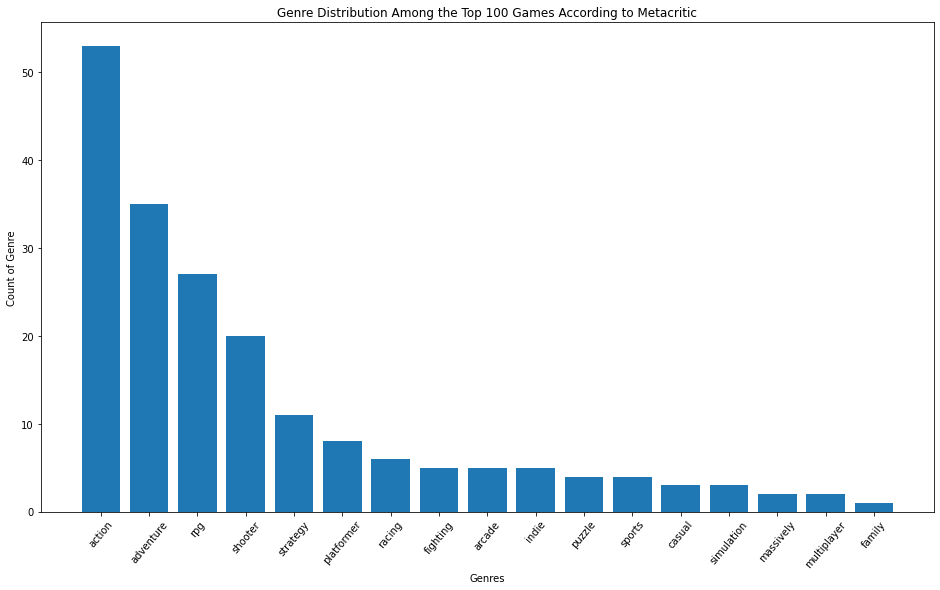

In [26]:
import collections
from collections import OrderedDict

# to sort the dictionary
results = OrderedDict(sorted(results.items(), key=lambda t: t[1], reverse=True))

w = collections.Counter(results)

plt.figure(figsize=(16,9))
plt.bar(w.keys(), w.values())
plt.xticks(rotation=50)
plt.xlabel("Genres")
plt.ylabel("Count of Genre")
plt.title("Genre Distribution Among the Top 100 Games According to Metacritic")
plt.show()

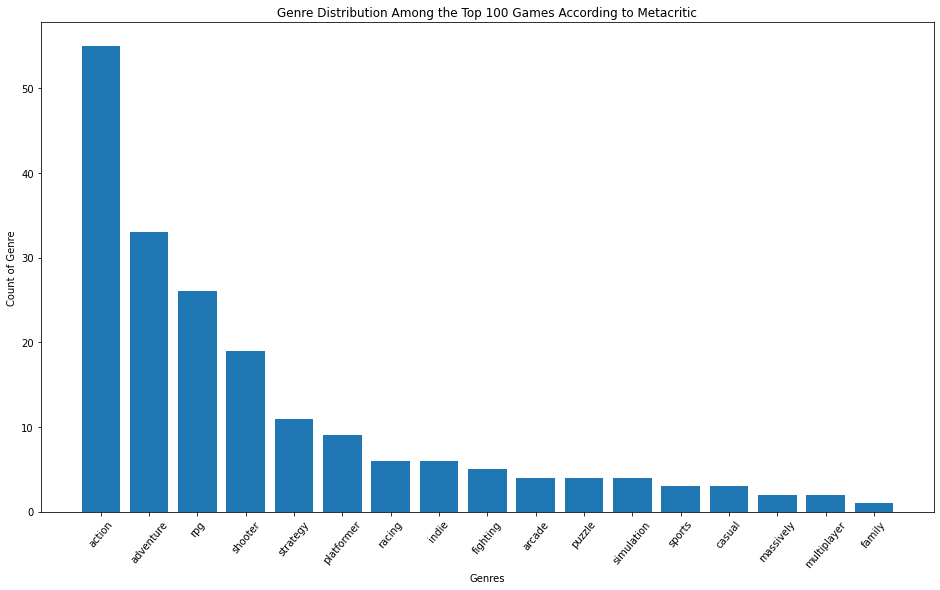

In [26]:
import collections
from collections import OrderedDict

# to sort the dictionary
results = OrderedDict(sorted(results.items(), key=lambda t: t[1], reverse=True))

w = collections.Counter(results)

plt.figure(figsize=(16,9))
plt.bar(w.keys(), w.values())
plt.xticks(rotation=50)
plt.xlabel("Genres")
plt.ylabel("Count of Genre")
plt.title("Genre Distribution Among the Top 100 Games According to Metacritic")
plt.show()

Among these games, `action` makes up slightly more than half of them, with `adventure` and `rpg` hitting 25%, followed by `shooter` and `strategy`. <br>
Surprisingly, `multiplayer` and `indie` have relatively low counts.

There are a few slight differences when considering `rating` instead of `metacritic`. Both showed that `action` is the most popular genre, while `rpg` and `adventure` show similar popularity. `indie` and `simulation` displayed a significant upward shift in ranking, while `fighting` games experienced a large drop in ranking. <br>
This result concurs with the one shown earlier: games that tend to be well receievd happen to be `action`, `rpg`, `adventure`, `shooter` and `strategy` games.

### 2.6.2 Top 100 Action Games List

In [27]:
top_100_action = df[df['genres'].str.contains("Action") == True].head(100)
top_100_action = top_100_action.sort_values(by='metacritic', ascending=False)
top_100_action['name'].values.tolist()

['The Legend of Zelda: Ocarina of Time',
 'Soulcalibur',
 'Grand Theft Auto V',
 'The Legend of Zelda: Breath of the Wild',
 'Red Dead Redemption 2',
 'Metroid Prime',
 'Metal Gear Solid 2: Sons of Liberty',
 'Half-Life',
 'Uncharted 2: Among Thieves',
 'BioShock',
 'Half-Life 2',
 'The Last Of Us Remastered',
 "The Legend of Zelda: Majora's Mask",
 'The Last Of Us',
 'Red Dead Redemption',
 'Metal Gear Solid 4: Guns of the Patriots',
 'Grand Theft Auto IV: Complete Edition',
 'Grand Theft Auto: Vice City',
 'God of War',
 'Diablo',
 'Batman: Arkham City',
 'Jet Set Radio',
 'BioShock Infinite',
 'Mass Effect 2',
 'God of War (2005)',
 'Quake',
 'The Last of Us Part II',
 'The Elder Scrolls V: Skyrim',
 'Half-Life: Alyx',
 'Uncharted 4: A Thief’s End',
 'Super Smash Bros. Brawl',
 'Grand Theft Auto: San Andreas',
 "Unreal Tournament 2004: Editor's Choice Edition",
 'Grand Theft Auto III',
 'Super Mario 3D World',
 'The Witcher 3: Wild Hunt',
 'Persona 5',
 "Tom Clancy's Splinter Cell C

In [30]:
top_100_action = df[df['genres'].str.contains("Action") == True].head(100)
top_100_action = top_100_action.sort_values(by='metacritic', ascending=False)
top_100_action['name'].values.tolist()

['The Legend of Zelda: Ocarina of Time',
 'Soulcalibur',
 'Grand Theft Auto V',
 'The Legend of Zelda: Breath of the Wild',
 'Red Dead Redemption 2',
 'Metroid Prime',
 'Half-Life',
 'BioShock',
 'Half-Life 2',
 'Uncharted 2: Among Thieves',
 'Metal Gear Solid 2: Sons of Liberty',
 'The Last Of Us',
 'Red Dead Redemption',
 "The Legend of Zelda: Majora's Mask",
 'The Last Of Us Remastered',
 'Jet Set Radio',
 'The Elder Scrolls V: Skyrim',
 'BioShock Infinite',
 'God of War (2005)',
 'The Last of Us Part II',
 'Mass Effect 2',
 'Quake',
 'Diablo',
 'God of War',
 'Grand Theft Auto: Vice City',
 'Grand Theft Auto IV: Complete Edition',
 'Metal Gear Solid 4: Guns of the Patriots',
 'Batman: Arkham City',
 'Uncharted 4: A Thief’s End',
 'Half-Life: Alyx',
 'Persona 5',
 'The Witcher 3: Wild Hunt',
 'Super Mario 3D World',
 'Grand Theft Auto: San Andreas',
 "Unreal Tournament 2004: Editor's Choice Edition",
 'Super Smash Bros. Brawl',
 'Grand Theft Auto III',
 'System Shock 2',
 'Banjo-Kaz

### 2.6.3 Top 100 Adventure Games List

In [31]:
top_100_adventure = df[df['genres'].str.contains("Adventure") == True].head(100)
top_100_adventure = top_100_adventure.sort_values(by='metacritic', ascending=False)
top_100_adventure['name'].values.tolist()

['The Legend of Zelda: Ocarina of Time',
 'The Legend of Zelda: Breath of the Wild',
 'Red Dead Redemption 2',
 'Metroid Prime',
 'Grand Theft Auto V',
 'Metal Gear Solid 2: Sons of Liberty',
 'Uncharted 2: Among Thieves',
 'The Last Of Us',
 'Persona 5 Royal',
 "The Legend of Zelda: Majora's Mask",
 'The Last Of Us Remastered',
 'The Last of Us Part II',
 'The Legend of Zelda: Ocarina of Time 3D',
 'God of War (2005)',
 'Batman: Arkham City',
 'God of War',
 'Grand Theft Auto: Vice City',
 'Grand Theft Auto IV: Complete Edition',
 'Grand Theft Auto III',
 'Grand Theft Auto: San Andreas',
 'Uncharted 4: A Thief’s End',
 'Half-Life: Alyx',
 'Maniac Mansion: Day of the Tentacle',
 'The Legend of Zelda: Skyward Sword',
 'The Witcher 3: Wild Hunt',
 'Persona 5',
 'OKAMI HD / 大神 絶景版',
 'The Witcher 3: Game of the Year',
 'Banjo-Kazooie',
 'The Walking Dead: Season 1',
 "Uncharted 3: Drake's Deception",
 "Tom Clancy's Splinter Cell Chaos Theory",
 'Journey',
 "Tom Clancy's Splinter Cell",
 '

### 2.6.4 Top 100 RPG Games List

In [32]:
top_100_rpg = df[df['genres'].str.contains("RPG") == True].head(100)
top_100_rpg = top_100_rpg.sort_values(by='metacritic', ascending=False)
top_100_rpg['name'].values.tolist()

['The Legend of Zelda: Ocarina of Time',
 'The Legend of Zelda: Breath of the Wild',
 'Persona 5 Royal',
 'Divinity: Original Sin 2',
 "Baldur's Gate II: Shadows of Amn",
 'Diablo',
 'Chrono Cross',
 'The Elder Scrolls IV: Oblivion',
 'Mass Effect 2',
 'Divinity: Original Sin - Enhanced Edition',
 'The Elder Scrolls IV: Oblivion Game of the Year Edition',
 'The Elder Scrolls V: Skyrim',
 'The Legend of Zelda: Ocarina of Time 3D',
 'Divinity: Original Sin 2 - Definitive Edition',
 'Persona 5',
 'Skies of Arcadia',
 'The Witcher 3: Wild Hunt',
 'World of Warcraft',
 'Fire Emblem Awakening',
 'Warcraft 3: Reign of Chaos',
 'Bloodborne',
 'Undertale',
 'System Shock 2',
 'The Witcher 3: Wild Hunt - Blood and Wine',
 'Final Fantasy XII',
 'The Witcher 3: Game of the Year',
 'Fallout 3',
 'Shadow of the Colossus',
 'Dragon Age: Origins',
 "Deus Ex: Human Revolution - Director's Cut",
 'Death Road to Canada',
 'World of Warcraft: The Burning Crusade',
 'Dark Souls II',
 "Baldur's Gate",
 'Dis

### 2.6.5 Top 100 Shooter Games List

In [33]:
top_100_shooter = df[df['genres'].str.contains("Shooter") == True].head(100)
top_100_shooter = top_100_shooter.sort_values(by='metacritic', ascending=False)
top_100_shooter['name'].values.tolist()

['Metroid Prime',
 'GoldenEye 007 (1997)',
 'Half-Life 2',
 'BioShock',
 'Metal Gear Solid 2: Sons of Liberty',
 'Half-Life 2: Update',
 'Half-Life',
 'Red Dead Redemption',
 'Portal 2',
 'Metal Gear Solid 4: Guns of the Patriots',
 'Halo 3',
 'The Last of Us Part II',
 'BioShock Infinite',
 'Gears of War 2',
 'System Shock 2',
 'Call of Duty 4: Modern Warfare',
 'Unreal Tournament: Game of the Year Edition',
 'Team Fortress 2',
 'Call of Duty',
 'METAL GEAR SOLID V: THE PHANTOM PAIN',
 'Killzone 2',
 'Fallout 3',
 'Resident Evil 2',
 'Overwatch',
 'STAR WARS Jedi Knight: Dark Forces II',
 'Crysis',
 'Halo: Reach',
 'Dishonored',
 'Gears of War 3',
 'Battlefield 2',
 'Medal of Honor Allied Assault',
 'Deus Ex: Game of the Year Edition',
 'Ratchet & Clank: Going Commando',
 'Modern Combat 2: Black Pegasus',
 'Halo: Combat Evolved',
 'Half-Life 2: Episode Two',
 'Gears of War',
 'Left 4 Dead',
 'Far Cry',
 'Left 4 Dead 2',
 'Borderlands 2',
 'STAR WARS Jedi Knight II - Jedi Outcast',
 'B

### 2.6.6 Top 100 Strategy Games List

In [34]:
top_100_strategy = df[df['genres'].str.contains("Strategy") == True].head(100)
top_100_strategy = top_100_strategy.sort_values(by='metacritic', ascending=False)
top_100_strategy['name'].values.tolist()

['XCOM 2: War of the Chosen',
 "Baldur's Gate II: Shadows of Amn",
 'Divinity: Original Sin 2',
 "Sid Meier's Civilization IV",
 'Company of Heroes',
 'Age of Empires II: Age of Kings',
 'Out of the Park Baseball 17',
 'Galactic Civilizations II: Ultimate Edition',
 'Warcraft 3: Reign of Chaos',
 'Rome: Total War - Collection',
 'Fire Emblem Awakening',
 "Baldur's Gate",
 'Ticket to Ride',
 'Tumblestone',
 "Sid Meier's Civilization III Complete",
 'World of Goo',
 'Into the Breach',
 'Hearthstone',
 'Empire: Total War',
 "Sid Meier's Civilization V",
 'Total War: SHOGUN 2',
 'Black & White',
 'Freedom Force',
 'Age of Mythology',
 'World in Conflict',
 'Sacrifice',
 'Fire Emblem: Three Houses',
 'XCOM: Enemy Unknown',
 'Railroad Tycoon II Platinum',
 'Rise of Nations: Extended Edition',
 "Sid Meier's Pirates!",
 'Medieval II: Total War',
 'EVE Online',
 'Sid Meier’s Civilization VI',
 'Shogo: Mobile Armor Division',
 'Fire Emblem: The Blazing Blade',
 'Fire Emblem Fates: Revelation',
 

## 2.7 Top 100 Video Games by Platform
Total platform count:

In [35]:
df['platforms'] = df['platforms'].astype(str)

df['platforms'] = df['platforms'].str.replace(',', '')

from collections import Counter
results = Counter()
df['platforms'].str.lower().str.split().apply(results.update)
print(results)

Counter({'pc': 8302, 'macos': 2858, 'playstation_4': 2213, 'linux': 1831, 'xbox_one': 1728, 'playstation_3': 1620, 'ios': 1430, 'xbox_360': 1365, 'nintendo_switch': 1215, 'android': 1029, 'ps_vita': 695, 'playstation_2': 616, 'wii': 609, 'wii_u': 470, 'playstation': 430, 'nintendo_3ds': 371, 'psp': 370, 'nintendo_ds': 294, 'xbox': 291, 'game_boy_advance': 286, 'gamecube': 275, 'nes': 228, 'genesis': 212, 'snes': 207, 'commodore_/_amiga': 191, 'classic_macintosh': 156, 'game_boy': 150, 'nintendo_64': 121, 'dreamcast': 109, 'atari_st': 84, 'game_boy_color': 82, 'sega_saturn': 79, 'sega_master_system': 61, 'game_gear': 58, 'web': 46, 'apple_ii': 46, 'atari_8-bit': 37, 'atari_2600': 36, 'sega_cd': 35, '3do': 34, 'neo_geo': 21, 'atari_5200': 16, 'sega_32x': 16, 'atari_7800': 15, 'jaguar': 14, 'playstation_5': 11, 'xbox_series_x': 10, 'atari_lynx': 9, 'atari_flashback': 7, 'nintendo_dsi': 6, 'nan': 4, 'atari_xegs': 3})


### 2.7.1 Overall Highest Rated Platforms Among Top 100

In [36]:
df['platforms'] = df['platforms'].astype(str)
# For top 100
top_100_df = df.sort_values(by='metacritic', ascending=False)[:100]
# remove comma
top_100_df['platforms'] = top_100_df['platforms'].str.replace(',', '')

from collections import Counter

results = Counter()
top_100_df['platforms'].str.lower().str.split().apply(results.update)
print(results)

Counter({'pc': 54, 'playstation_4': 29, 'playstation_3': 28, 'xbox_360': 27, 'macos': 25, 'xbox_one': 18, 'nintendo_switch': 13, 'playstation_2': 12, 'linux': 11, 'wii_u': 10, 'ios': 10, 'xbox': 10, 'android': 9, 'gamecube': 8, 'wii': 8, 'ps_vita': 6, 'nintendo_64': 5, 'nintendo_3ds': 5, 'dreamcast': 3, 'playstation': 3, 'game_boy_advance': 3, 'nintendo_ds': 3, 'playstation_5': 2, 'psp': 1, 'nintendo_dsi': 1})


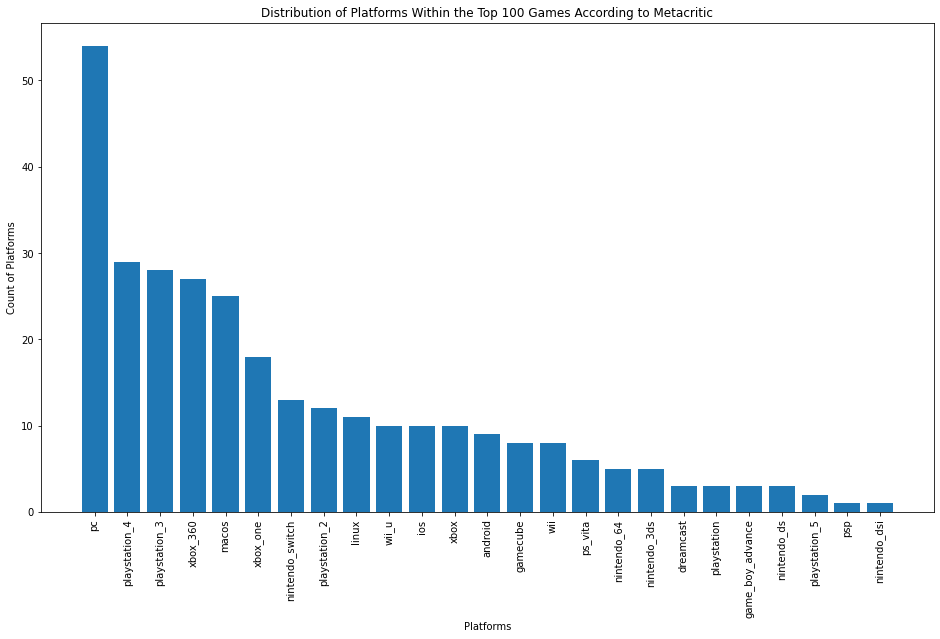

In [37]:
import collections
from collections import OrderedDict

# to sort the dictionary
results = OrderedDict(sorted(results.items(), key=lambda t: t[1], reverse=True))

w = collections.Counter(results)

plt.figure(figsize=(16,9))
plt.bar(w.keys(), w.values())
plt.xticks(rotation=90)
plt.xlabel("Platforms")
plt.ylabel("Count of Platforms")
plt.title("Distribution of Platforms Within the Top 100 Games According to Metacritic")
plt.show()

Unsurprisingly, PC games prove to have the largest library of popular games. The PlayStation 4 has slightly more than half of the PC's library, which is commendable since the earliest PlayStation 4 game ever released is in 2013, as compared to the PC's earliest record year in the database to be 1971. The PlayStation 3 and Xbox 360 share a similar figure. The difference could be from the console exclusives (which usually tend to perform well on metacritic scores). <br>

However, the Xbox One fared poorly as compared to the PlayStation 4. A possbile reason could be that most first-party Microsoft games are also released on PC (such titles include **Forza Horizon 4, Ori and the Will of the Wisps, Cuphead** and **Gears of War 4**) and PC games tend to run better and are more optimised than their console counterparts. The PlayStation 4 features a large range of console exclusives as well (e.g. **The Last Of Us Remastered, Persona 5 Royal, God of War, Uncharted 4: A Thief’s End, Bloodborne, Shadow of the Colossus (2018), Horizon Zero Dawn**). This could explain the significant gap. The Nintendo Switch is just behind the Xbox One. Although the Nintendo Switch features very strong exclusives such as **The Legend of Zelda: Breath of the Wild, Super Mario Odyssey, Super Smash Bros. Ultimate, Mario Kart 8 Deluxe, Animal Crossing: New Horizons, Xenoblade Chronicles: Definitive Edition, Fire Emblem: Three Houses**, it also offers ports of older popular titles like **The Elder Scrolls V: Skyrim, Divinity: Original Sin 2 - Definitive Edition, The Witcher 3: Wild Hunt, Undertale**. However, these titles were already released on PC, PlayStation 4 and Xbox One, machines that are more computationally powerful than the Nintendo Switch. Thus professional reviewers are likely to evaluate how well these older titles run on the Switch and strenghs over other platforms. <br>

A surprise from this result is that the Xbox One has fewer games in the top 100 as compared to the Xbox 360. 42 (out of 999) Xbox games and 577 (out of 2084) Xbox 360 (as of December 2020) are compatible with the Xbox One. Hence, the Xbox One should have a higher count that Xbox 360 in theory. This may not be reflected in the RWAG database.

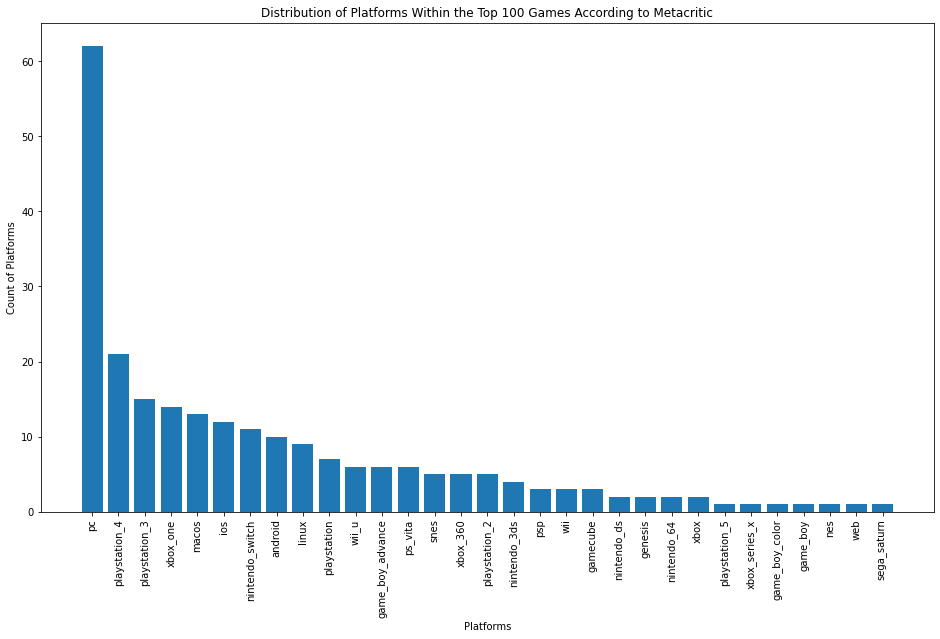

In [38]:
df['platforms'] = df['platforms'].astype(str)
top_100_dfr = df.sort_values(by='rating', ascending=False)[:100]
top_100_dfr = top_100_dfr[(top_100_dfr['platforms'] != 'nan')]
# For top 100

# remove comma
top_100_dfr['platforms'] = top_100_dfr['platforms'].str.replace(',', '')

from collections import Counter

results = Counter()
top_100_dfr['platforms'].str.lower().str.split().apply(results.update)

import collections
from collections import OrderedDict

# to sort the dictionary
results = OrderedDict(sorted(results.items(), key=lambda t: t[1], reverse=True))

w = collections.Counter(results)

plt.figure(figsize=(16,9))
plt.bar(w.keys(), w.values())
plt.xticks(rotation=90)
plt.xlabel("Platforms")
plt.ylabel("Count of Platforms")
plt.title("Distribution of Platforms Within the Top 100 Games According to Metacritic")
plt.show()

Looking at the result based on the internal ratings, the PC and PlayStation 4 are still the platforms with the highest rated titles. The Xbox One fares better under this measure. However, the Xbox 360 has a drastic fall in count. <br>

Both results support the claim that the PC has the most number of highly rated games across all generations.

### 2.7.2 Timeless Generation

#### 2.7.2.1 Top 100 PC Games List

In [39]:
top_100_pc = df[df['platforms'].str.contains("PC") == True].head(100)
top_100_pc = top_100_pc.sort_values(by='metacritic', ascending=False)
top_100_pc['name'].values.tolist()

['Grand Theft Auto V',
 'Red Dead Redemption 2',
 'Half-Life',
 'Half-Life 2: Update',
 'BioShock',
 'Half-Life 2',
 'XCOM 2: War of the Chosen',
 'Portal 2',
 'Divinity: Original Sin 2',
 "Baldur's Gate II: Shadows of Amn",
 'Quake',
 'The Elder Scrolls V: Skyrim',
 'The Elder Scrolls IV: Oblivion Game of the Year Edition',
 'Divinity: Original Sin - Enhanced Edition',
 'Mass Effect 2',
 'Jet Set Radio',
 'BioShock Infinite',
 'Batman: Arkham City',
 "Sid Meier's Civilization IV",
 'The Elder Scrolls IV: Oblivion',
 'Diablo',
 'Grand Theft Auto IV: Complete Edition',
 'Halo 3',
 'Grand Theft Auto: Vice City',
 'Cut the Rope',
 'Divinity: Original Sin 2 - Definitive Edition',
 'Company of Heroes',
 'The Witcher 3: Wild Hunt',
 'Maniac Mansion: Day of the Tentacle',
 'Half-Life: Alyx',
 'World of Warcraft',
 "Unreal Tournament 2004: Editor's Choice Edition",
 'Grand Theft Auto: San Andreas',
 'Grand Theft Auto III',
 'OKAMI HD / 大神 絶景版',
 'The Witcher 3: Game of the Year',
 'Call of Dut

#### 2.7.2.2 Top 100 Mac OS Games List

In [40]:
top_100_mac = df[df['platforms'].str.contains("macOS") == True].head(100)
top_100_mac = top_100_mac.sort_values(by='metacritic', ascending=False)
top_100_mac['name'].values.tolist()

['Half-Life',
 'Half-Life 2',
 'BioShock',
 'XCOM 2: War of the Chosen',
 'Portal 2',
 "Baldur's Gate II: Shadows of Amn",
 'Grand Theft Auto: Vice City',
 'Diablo',
 "Sid Meier's Civilization IV",
 'Batman: Arkham City',
 'Divinity: Original Sin - Enhanced Edition',
 'World of Warcraft',
 'Maniac Mansion: Day of the Tentacle',
 'Divinity: Original Sin 2 - Definitive Edition',
 'Grand Theft Auto: San Andreas',
 'Grand Theft Auto III',
 'Team Fortress 2',
 'Warcraft 3: Reign of Chaos',
 'The Walking Dead: Season 1',
 'Undertale',
 'System Shock 2',
 'Call of Duty 4: Modern Warfare',
 'Out of the Park Baseball 17',
 'Mark of the Ninja',
 'Dragon Age: Origins',
 'Shovel Knight: Treasure Trove',
 'Batman: Arkham Asylum',
 'Celeste',
 "Deus Ex: Human Revolution - Director's Cut",
 'Call of Duty',
 'Batman: Arkham City - Game of the Year Edition',
 'Death Road to Canada',
 'World of Warcraft: The Burning Crusade',
 'Tumblestone',
 'Ticket to Ride',
 "Baldur's Gate",
 'World of Warcraft: Wrat

#### 2.7.2.3 Top 100 Mobile Phone Games List

In [41]:
top_100_mobile = df[(df['platforms'].str.contains("iOS") == True) | (df['platforms'].str.contains("Android") == True)].head(100)
top_100_mobile = top_100_mobile.sort_values(by='metacritic', ascending=False)
top_100_mobile['name'].values.tolist()

['Soulcalibur',
 'Half-Life 2',
 'BioShock',
 "Baldur's Gate II: Shadows of Amn",
 'Grand Theft Auto: Vice City',
 'Jet Set Radio',
 'Grand Theft Auto III',
 'Grand Theft Auto: San Andreas',
 'Cut the Rope',
 'Rome: Total War - Collection',
 'The Walking Dead: Season 1',
 'Journey',
 'Tumblestone',
 'STREET FIGHTER IV',
 'Death Road to Canada',
 "Tony Hawk's Pro Skater 2",
 'Ticket to Ride',
 "Baldur's Gate",
 'FEZ',
 'DRAGON QUEST V',
 'World of Goo',
 'Half-Life 2: Episode Two',
 'Hearthstone',
 'NBA 2K17',
 'Braid',
 'STAR WARS - Knights of the Old Republic',
 'Grand Theft Auto: Chinatown Wars',
 'Portal',
 'Brothers - A Tale of Two Sons',
 'Modern Combat 2: Black Pegasus',
 'Max Payne',
 'Monument Valley',
 'Flower',
 'FRAMED 2',
 'XCOM: Enemy Unknown',
 'Stardew Valley',
 'Sid Meier’s Civilization VI',
 'Injustice 2',
 'Limbo',
 'Super Hexagon',
 'West of Loathing',
 'Card Thief',
 'Dead Cells',
 'Her Story',
 "Alto's Odyssey",
 'The Room Two',
 'ROME: Total War',
 'FINAL FANTASY 

## 2.8 Top 100 by Tags

In [45]:
top_100_df = df.sort_values(by='metacritic', ascending=False)[:100]

top_100_df['tags'] = top_100_df['tags'].astype(str)
top_100_df['tags'] = top_100_df['tags'].str.replace(',', '')

from collections import Counter
results2 = Counter()
top_100_df['tags'].str.lower().str.split().apply(results2.update)

0      None
1      None
2      None
3      None
4      None
       ... 
91     None
104    None
103    None
101    None
100    None
Name: tags, Length: 100, dtype: object

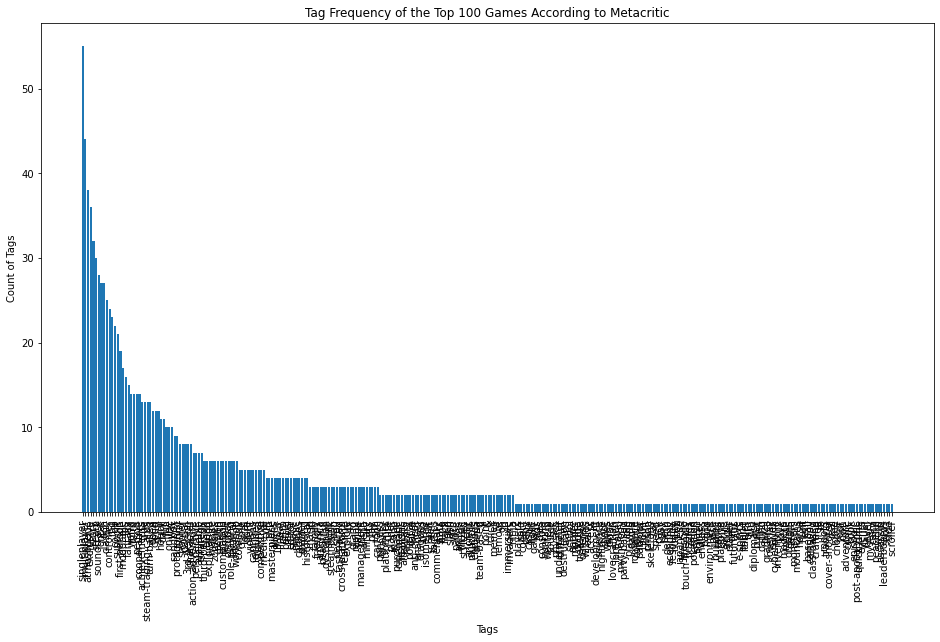

In [46]:
import collections
from collections import OrderedDict

# to sort the dictionary
results2 = OrderedDict(sorted(results2.items(), key=lambda t: t[1], reverse=True))

w = collections.Counter(results2)

plt.figure(figsize=(16,9))
plt.bar(w.keys(), w.values())
plt.xticks(rotation=90)
plt.xlabel("Tags")
plt.ylabel("Count of Tags")
plt.title("Tag Frequency of the Top 100 Games According to Metacritic")
plt.show()

It looks like there is too much tags to perform any useful data analysis. Hence, I will analyse the tags using a Word Cloud instead.

`tags` will still be one of the features for a predictive model later.

# 3. Word Cloud
## 3.1 Standard Word Cloud for Video Game Tags

The only required argument for a WordCloud object is `text`, while all others are optional. <br>
The 5 steps are:

1. Extract tags (`text` document)
2. Set `wordcloud` image (optional)
3. Assign a list of `stopwords`
4. Create and generate a `wordcloud` image
5. Display cloud using `matplotlib`

In [19]:
df = pd.read_csv('../Data/data5.csv')

In [21]:
# ensure not empty tag values
df['tags'] = df['tags'].fillna('NA')

# split tags string into a list with ", " as the separator
df['tags'] = df['tags'].apply(lambda x: x.split(', '))

# create separate columns for each element in tag list
a2 = pd.get_dummies(df['tags'].explode()).sum(level=0)
a2

,'''Arcade''','''Mega Drive/Genesis''','''SNES''',1 to 4 Players,1-bit,100% completion bonus,16-bit,1930s,1960s,1980s,...,x-ray,your,youtube,zach-like,zachtronics,zelda,zelda-like,zelda-style,zen,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extract all tags (column names) and remove the unclean part of the text (first 3 columns):

In [24]:
# create empty string
text_temp = ""

for col in a2.columns:
    # concanternate all tags
    text_temp = text_temp +  " " + col

# see output
text_temp

" '''Arcade''' '''Mega Drive/Genesis''' '''SNES''' 1 to 4 Players 1-bit 100% completion bonus 16-bit 1930s 1960s 1980s 1990's 1–2 player (co-op 2 players 2-d-platformer 2.5D 2000s 2D 2D Fighter 2D Platformer 30s 32-bit 360 Video 3D 3D Platformer 3D Vision 3rd-Person Perspective 3rd-person 4 Player Local 4-player multiplayer 4X 6DOF 7dfps 8-Bit 90s-style AR support Abstract Action RPG Action Roguelike Action-Adventure Addictive Aerial Sports Agriculture Aliens Alternate History America Animals Animation & Modeling Anime Arena Shooter Artificial Intelligence Assassin Asteroids Asymmetric VR Asynchronous Multiplayer Atmospheric Automation Base Building Based On A Novel Basketball Batman Battle Royale Battle.net Beat 'em up Beautiful Benchmark Bikes Black and White Blood Board Game Boss battle Bowling Building Bullet Hell Bullet Time CRPG Capitalism Captions available Card Game Cartes à échanger Steam Cartoon Cartoony Character Action Game Character Customization Chess Chicken Choices Matt

In [25]:
# 1st step: extract values
text = text_temp[50:]
text

"1 to 4 Players 1-bit 100% completion bonus 16-bit 1930s 1960s 1980s 1990's 1–2 player (co-op 2 players 2-d-platformer 2.5D 2000s 2D 2D Fighter 2D Platformer 30s 32-bit 360 Video 3D 3D Platformer 3D Vision 3rd-Person Perspective 3rd-person 4 Player Local 4-player multiplayer 4X 6DOF 7dfps 8-Bit 90s-style AR support Abstract Action RPG Action Roguelike Action-Adventure Addictive Aerial Sports Agriculture Aliens Alternate History America Animals Animation & Modeling Anime Arena Shooter Artificial Intelligence Assassin Asteroids Asymmetric VR Asynchronous Multiplayer Atmospheric Automation Base Building Based On A Novel Basketball Batman Battle Royale Battle.net Beat 'em up Beautiful Benchmark Bikes Black and White Blood Board Game Boss battle Bowling Building Bullet Hell Bullet Time CRPG Capitalism Captions available Card Game Cartes à échanger Steam Cartoon Cartoony Character Action Game Character Customization Chess Chicken Choices Matter Choose Your Own Adventure Christmas Cinematic C

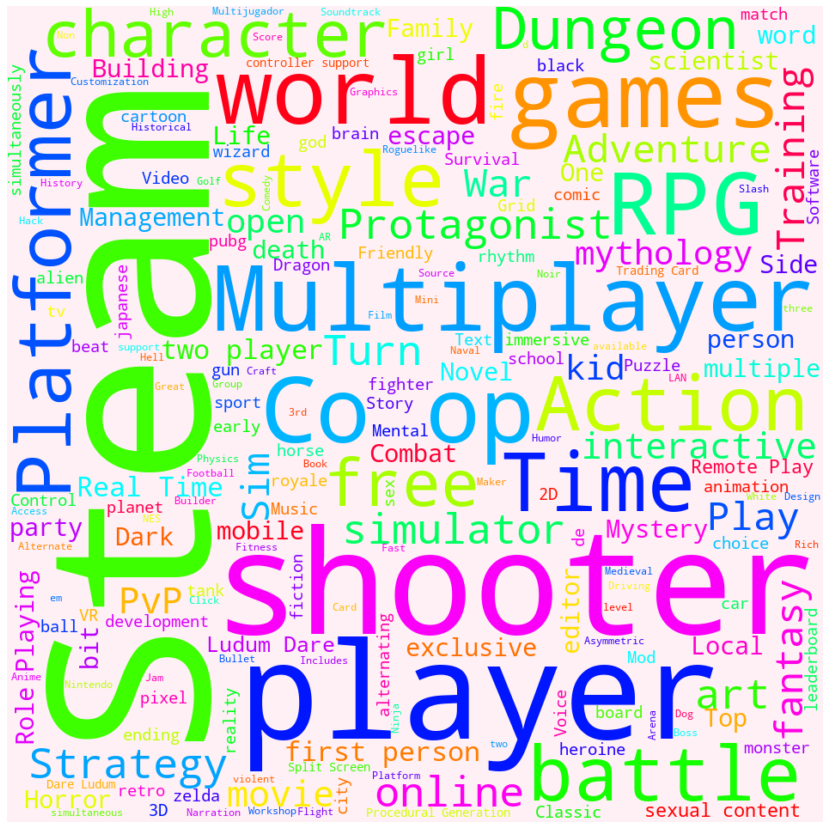

In [26]:
# 2nd step: Set wordcloud image - skipped

# 3rd step: Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(['game', 'Based'])

# 4th step: Generate a word cloud image
wordcloud = WordCloud(background_color="lavenderblush", 
                      colormap="hsv",
                      contour_width=2, 
                      contour_color="black",
                      width=950, 
                      stopwords=stopwords,
                      height=950).generate(text)

# 5th step: Display the generated image the matplotlib way
plt.subplots(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The argument `interpolation="bilinear"` in the `plt.imshow()` is to make the displayed image appear more smoothly.

To save the image, `wordcloud` use `to_file()`:

In [29]:
# Saves the WordCloud image:
wordcloud.to_file('../Graphics/tags_workcloud.png')

In [30]:
# word frequency check
print ("There are {} words in the combination of all tags.".format(len(text)))

There are 14497 words in the combination of all tags.


## 3.2 Word Cloud for Video Game Tags with Image
### 3.2.1 Process Image File for Wordcloud

In [31]:
game_mask = np.array(Image.open('../Graphics/tag-icon.jpg'))
game_mask

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245]], dtype=uint8)

The masking function requires all white part of the mask to be 255, not 0 (integer type). This value represents the "intensity" of the pixel. <br>
* 255 = pure white
* 1 = black

If a mask has a background that is not 0, but 1 or 2, adjust the function to match mask.

Use `transform_format()` to swap number 0 to 255. Then, create a new mask with the same shape as the mask you have in hand and apply `transform_format()` to each value in each row of the previous mask:

In [32]:
# function to make image compatible
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

# Transforms mask into a new one that's compatible with WordCloud():
transformed_mask = np.ndarray((game_mask.shape[0],game_mask.shape[1]), np.int32)

for i in range(len(game_mask)):
    transformed_mask[i] = list(map(transform_format, game_mask[i]))
    
# Check the expected result of your mask
transformed_mask

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245]])

In `WordCloud()`, there is a `mask` argument that takes in the transformed mask created above. The `contour_width` and `contour_color` are arguments to adjust the outline characteristics of the cloud. <br>
[Color code table](https://matplotlib.org/2.0.0/examples/color/named_colors.html)

In [34]:
df = pd.read_csv('../Data/data5.csv')

from collections import Counter

df['tags'] = df['tags'].str.replace(",", '')
text_tag = " ".join(str(i) for i in df['tags'])
data_tag = Counter(text_tag.split())

# remove 'nan' key
data_tag.pop('nan', None)
data_tag

Counter({'Singleplayer': 7312,
         '2': 69,
         'players': 79,
         'Full': 2028,
         'controller': 2283,
         'support': 2284,
         'Steam': 7758,
         'Achievements': 3831,
         'Atmospheric': 1380,
         'Comedy': 592,
         'Co-op': 1297,
         'Crime': 82,
         'First-Person': 857,
         'Funny': 745,
         'Great': 1478,
         'Soundtrack': 1535,
         'Moddable': 179,
         'Multiplayer': 4061,
         'Open': 959,
         'World': 1091,
         'RPG': 2075,
         'Sandbox': 509,
         'Third': 590,
         'Person': 590,
         'Third-Person': 220,
         'Shooter': 420,
         'cooperative': 1203,
         'Action-Adventure': 217,
         'exclusive': 1525,
         'Solo': 30,
         'princess': 23,
         'Gravity': 17,
         'mario': 28,
         'collect': 38,
         'baby': 7,
         'castle': 25,
         'light': 6,
         'galaxy': 24,
         '3D': 238,
         'Platformer':

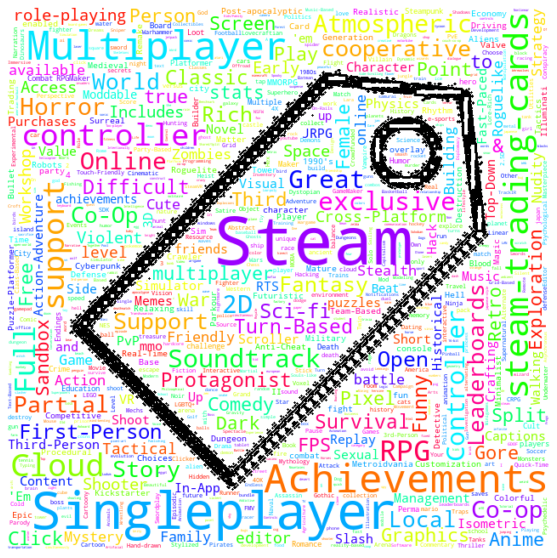

In [36]:
# wordcloud settings
wc = WordCloud(background_color="white",
               max_words=1000,
               mask=transformed_mask,
               stopwords=stopwords,
               colormap="hsv",
               contour_width=2,
               contour_color='black')

# Generate a wordcloud
wc.generate_from_frequencies(data_tag)
# or
# wc.generate(data_tag)

# Saves the wordcloud as a PNG file
# wc.to_file('../Graphics/tag_cloud.png')
# plt.savefig('../Graphics/tag_plot.png')

# Display the generated image
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

It's a safe guess that most of the games with `tags` are featured on [Steam](https://store.steampowered.com) since 'Steam' appears really large on this Word Cloud. This is no surprise since it's a common trend for older console exclusive titles on the Xbox 360 and PS3 are gradually being ported to PC. <br>

# 4. Scatter Plots

## 4.1 PC's Most Popular Games

In [38]:
df = pd.read_csv('../Data/data5.csv')

In [39]:
top_100_pc = df[df['platforms'].str.contains("PC") == True].head(100)
top_100_pc = top_100_pc.sort_values(by='metacritic', ascending=False)

In [43]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

trace1 = go.Scatter(
                    x = top_100_pc['Year'],
                    y = top_100_pc['rank'],
                    mode = "markers",
                    name = "Year of Release",
                    marker = dict(color = top_100_pc['rank'],size=8),
                    #marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= top_100_pc['name'])

data = [trace1]
layout = dict(title = "PC's Top 100 Games",
              xaxis= dict(title= 'Year of Release',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )

fig = dict(data = data, layout = layout)
fig['layout']['yaxis']['autorange'] = "reversed"
iplot(fig)

## 4.2 The Most Popular Games of This Generation

In [44]:
df = pd.read_csv('../Data/data5.csv')
df.drop(['rank'], axis=1,inplace=True)

In [45]:
# PS4
top_100_ps4 = df[df['platforms'].str.contains("PlayStation_4") == True].head(100)
top_100_ps4 = top_100_ps4.sort_values(by='metacritic', ascending=False)
top_100_ps4.reset_index(drop=True, inplace=True)
top_100_ps4.insert(0, 'rank', range(1, 1+len(top_100_ps4)))

# Xbox One
top_100_xbone = df[df['platforms'].str.contains("Xbox_One") == True].head(100)
top_100_xbone = top_100_xbone.sort_values(by='metacritic', ascending=False)
top_100_xbone.reset_index(drop=True, inplace=True)
top_100_xbone.insert(0, 'rank', range(1, 1+len(top_100_xbone)))

# Nintendo Switch
top_100_switch = df[df['platforms'].str.contains("Nintendo_Switch") == True].head(100)
top_100_switch = top_100_switch.sort_values(by='metacritic', ascending=False)
top_100_switch.reset_index(drop=True, inplace=True)
top_100_switch.insert(0, 'rank', range(1, 1+len(top_100_switch)))

# PC
top_100_pc = df[df['platforms'].str.contains("PC") == True].head(100)
top_100_pc = top_100_pc.sort_values(by='metacritic', ascending=False)
top_100_pc.reset_index(drop=True, inplace=True)
top_100_pc.insert(0, 'rank', range(1, 1+len(top_100_pc)))

In [46]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

trace1 = go.Scatter(
                    x = top_100_ps4['rank'],
                    y = top_100_ps4['Year'],
                    mode = "markers",
                    name = "PS4",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= top_100_ps4['name'])

trace2 = go.Scatter(
                    x = top_100_xbone['rank'],
                    y = top_100_xbone['Year'],
                    mode = "markers",
                    name = "Xbox One",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= top_100_xbone['name'])
trace3 = go.Scatter(
                    x = top_100_switch['rank'],
                    y = top_100_switch['Year'],
                    mode = "markers",
                    name = "Nintendo Switch",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= top_100_switch['name'])
trace4 = go.Scatter(
                    x = top_100_pc['rank'],
                    y = top_100_pc['Year'],
                    mode = "markers",
                    name = "PC",
                    marker = dict(color = 'lime',size=8),
                    text= top_100_pc['name'])

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Year of Release',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )

fig = dict(data = data, layout = layout)
iplot(fig)

At this point, the top games for each of the 4 consoles are: <br>
- PC: **Grand Theft Auto V**
- PS4: **Grand Theft Auto V**
- Xbox One: **Soul Calibur**
- Nintendo Switch: **The Legend of Zelda: Breath of the Wild**

There are a few overlaps with the PC, PlayStation 4 and Xbox One titles. <br>

When we look at the game titles, we see that the first few games have very similar genres.

# 5. A Closer Look At These Popular Games

## 5.1 Genre Breakdown
### 5.1.1 Genre Breakdown of 100 Highest Rated Metacritic Games 

In [47]:
top_100 = df.copy()

top_100.sort_values(by='metacritic', ascending=False, inplace=True)
top_100 = top_100.head(100)
top_100.reset_index(drop=True, inplace=True)
top_100.insert(0, 'rank', range(1, 1+len(top_100)))

# remove comma
top_100['genres'] = top_100['genres'].str.replace(',', '')
top_100['genres'] = top_100['genres'].astype(str)
from collections import Counter

results = Counter()
top_100['genres'].str.lower().str.split().apply(results.update)
print(results)

Counter({'action': 53, 'adventure': 35, 'rpg': 27, 'shooter': 20, 'strategy': 11, 'platformer': 8, 'racing': 6, 'fighting': 5, 'arcade': 5, 'indie': 5, 'puzzle': 4, 'sports': 4, 'casual': 3, 'simulation': 3, 'massively': 2, 'multiplayer': 2, 'family': 1})


In [48]:
top_100_v2 = pd.DataFrame.from_dict(results, orient='index').reset_index()

In [49]:
top_100_v2 = top_100_v2.rename(columns={'index':'genres', 0:'count'})
top_100_v2

,genres,count
0,action,53
1,adventure,35
2,rpg,27
3,fighting,5
4,platformer,8
5,arcade,5
6,shooter,20
7,racing,6
8,strategy,11
9,puzzle,4


In [50]:
import plotly.express as px

fig = px.bar(top_100_v2, x="genres", y='count')
fig.show()

## 5.2 Average Metacritic Scores By the Years

In [83]:
top_100 = df.copy()
top_100.sort_values(by='metacritic', ascending=False, inplace=True)
top_100 = top_100.head(100)
top_100.reset_index(drop=True, inplace=True)

In [84]:
year=pd.DataFrame(top_100.groupby("Year")["metacritic"].mean())
year.reset_index(level=0, inplace=True)
yearcount=pd.DataFrame(top_100["Year"].value_counts())
yearcount.reset_index(level=0, inplace=True)
yearcount.rename(columns={"Year": "Counts","index":"Year"}, inplace=True)

year=pd.merge(year,yearcount,on="Year")

In [85]:
table_data=year[["Year","metacritic"]]
table_data = table_data.rename(columns = {"metacritic": "Average Metacritic Score"})

In [86]:
x=year.Year
score_mean=list(year["metacritic"])

trace1 = go.Bar(
    x=x,
    y=score_mean,
    name="Metacritic Score Average" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)

trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    #values = [table_data.Genre,round(table_data["North America"]),round(table_data["Europe"]), round(table_data["Japan"]), round(table_data["Other"]),round(table_data["Total"])],
    values = [table_data.Year,round(table_data["Average Metacritic Score"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='Average Metacritic Scores of the Top 100 Titles',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Year',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Average Metacritic Score",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Average Metacritic Scores According to Year',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='By Year',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 5.3 Average Internal Ratings (Out of 5) By the Years

In [87]:
df = pd.read_csv('../Data/data5.csv')
df.drop(['rank'], axis=1,inplace=True)

In [88]:
top_100r = df.copy()
top_100r.sort_values(by='rating', ascending=False, inplace=True)
top_100r = top_100r.head(100)
top_100r.reset_index(drop=True, inplace=True)

year=pd.DataFrame(top_100r.groupby("Year")["rating"].mean())
year.reset_index(level=0, inplace=True)
yearcount=pd.DataFrame(top_100r["Year"].value_counts())
yearcount.reset_index(level=0, inplace=True)
yearcount.rename(columns={"Year": "Counts","index":"Year"}, inplace=True)

year=pd.merge(year,yearcount,on="Year")

table_data=year[["Year","rating"]]
table_data = table_data.rename(columns = {"rating": "Average Internal Ratings"})

x=year.Year
score_mean=list(year["rating"])

trace1 = go.Bar(
    x=x,
    y=score_mean,
    name="Rating Score Average" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)

trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Year,round(table_data["Average Internal Ratings"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='Average Internal Ratings of the Top 100 Titles',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Year',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Average Metacritic Score",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Average Internal Ratings According to Year',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='By Year',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 6. Which Year is the "Golden Year of Gaming"?

## 6.1 Using Metacritic Scores

In [89]:
trace = go.Histogram(x=top_100['Year'],marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)

layout = go.Layout(
    title='Distribution of the Top 100 Video Games According to Metacritic (By Year)',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)

fig.layout.sliders = [dict(
                active = 4,
                currentvalue = {"prefix": "bin size: "},
                pad = {"t": 20},
                steps = [dict(label = i, method = 'restyle',  args = ['xbins.size', i]) for i in range(1,10)]
            )]

iplot(fig)

2011 seems to be the best year for many professional video game reviewers. Notably titles include **Batman: Arkham City, Portal 2, The Elder Scrolls V: Skyrim, Battlefield 3, Uncharted 3: Drake's Deception, Dark Souls, L.A. Noire, Deux Ex: Human Revolution, Gears of War 3, Dead Space 2, The Witcher 2: Assassins of Kings**.

## 6.2 Using Internal Rating Scores

In [90]:
top_100r = df.copy()

top_100r.sort_values(by='rating', ascending=False, inplace=True)
top_100r = top_100r.head(100)
top_100r.reset_index(drop=True, inplace=True)
top_100r.insert(0, 'rank', range(1, 1+len(top_100r)))

trace = go.Histogram(x=top_100r['Year'],marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)

layout = go.Layout(
    title='Distribution of the Top 100 Video Games According to Internal Ratings (By Year)',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)

fig.layout.sliders = [dict(
                active = 4,
                currentvalue = {"prefix": "bin size: "},
                pad = {"t": 20},
                steps = [dict(label = i, method = 'restyle',  args = ['xbins.size', i]) for i in range(1,10)]
            )]

iplot(fig)

2017 featured strong titles like **Gravity Rush 2, Resident Evil 7: Biohazard, Horizon Zero Dawn, The Legend of Zelda: Breath of the Wild, Persona 5, Prey, Super Mario Odyssey, South Park: The Fractured But Whole, Cuphead, Gran Turismo Sport**. <br>

2015 has **Monster Hunter 4 Ultimate, SOMA, Ori and the Blind Forest, Life is Strange, Her Story, Splatoon, Until Dawn, Rocket League, Rise of the Tomb Raider, Fallout 4, Bloodborne, The Witcher 3: The Wild Hunt, Metal Gear Solid V: The Phantom Pain**.

# 7 .Conclusion
While the RWAG data has provide much insights into figuring out what makes a game highly rated by professional video game reviewers, the database doesn't provide sales data on these video games. In reality, a game with impressive Metacritic score doesn't necessarily means that it will generate much profits for its developers. After all, Metacritic scores aren't perfect, they are simply aggregate review scores which gives a general sentiment of a video game. Prehaps we could also look into sales revenue to determine the factors of a best-selling game, as well as establish a relationship between Metacritic Scores and profits.